# Regressão Logística

**Objetivos**: Aprender o que é Regressão Logística e Regressão Softmax usando a biblioteca `Scikit-Learn`. Introduzir o aluno aos problemas de classificação de aprendizagem de máquina.

## Definição - Regressão Logística

> Uma regressão logística se comporta exatamente como um modelo linear: faz uma predição simplesmente computando uma soma ponderada dos atributos (*features*), mais uma constante chamada viés (*bias*), também chamado de constante (*intercept*). Porém ao invés de retornar um valor contínuo, como a regressão linear, retorna a função logística desse valor.

$$\operatorname{Logística}(x) = \frac{1}{1 + e^{(-x)}}$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

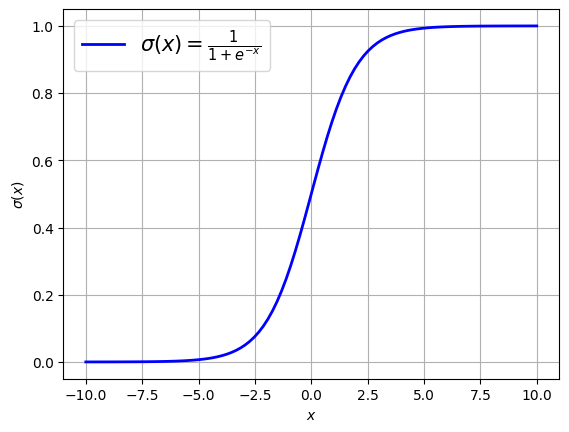

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x,y, 'b-', linewidth=2,  label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.legend(loc="upper left", fontsize=15)
plt.grid(True)

In [ ]:
# Versão não vetorizada, é para dar o mesmo resultado
y2 = np.zeros(100)
for i in range(100):
  y2[i] = 1 / (1 + np.exp(-x[i]))

$$ \operatorname{Linear} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

$\operatorname{Linear}$ - regressão linear

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)

$ \hat{p} = \sigma(\operatorname{Linear}) = \frac{1}{1 + e^{-\operatorname{Linear}}}$

$\hat{p}$ - probabilidade prevista da observação ser 1

$\hat{y}=\left\{\begin{array}{ll} 0 & \text { se } \hat{p} < 0.5 \\ 1 & \text { se } \hat{p} \geq 0.5 \end{array}\right.$

### Exemplo

$\mathrm{Previsão~de~Morte} = \sigma \big(-10 + 10\times \mathrm{cancer} + 12 \times \mathrm{diabetes} + 8 \times \mathrm{obesidade} \big)$

In [ ]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
cancer = 0
diabetes = 0
obesidade = 1

Linear = -10 + 10* cancer + 12 * diabetes + 8 * obesidade
print(Linear)

# Probabilidade de ser da classe 1
print( logistic(Linear) )


-2
0.11920292202211755


In [ ]:
round( logistic(Linear)  )

0

Exemplo)

In [ ]:
cancer = 0
diabetes = 0
obesidade = 0

Linear = -10 + 10* cancer + 12 * diabetes + 8 * obesidade

# Log Loss
print( -np.log(logistic(Linear)) )


10.000045398899218


## Métricas de Desempenho de uma Regressão Logística

### MSE (?)
$$MSE = \frac{1}{m}\Sigma_{i=1}^{m}{(\hat{y}_i - y_i)^2}$$
Nossa predição agora é não-linear (devido à transformação logística). Se nós elevarmos essa predição ao quadrado (como fazemos em MSE) resulta em uma função não convexa e com muitos local minima, portanto, inviabilizando o Método do Gradiente Descendente.

### *Log Loss*

Se divide em duas métricas de desempenho

$$Log~Loss=\left\{\begin{array}{ll} -\log(\hat{p}) & \text { se } y = 1 \\ -\log(1 - \hat{p}) & \text { se } y = 0 \end{array}\right.$$

Faz sentido porque:

* $- \log(\hat{p})$ se torna grande quando $\hat{p}$ se aproxima de 0 - Erro vai ser grande quando o modelo prevê $\hat{p} \approx 0$ mas $y = 1$
* $- \log(1 - \hat{p})$ se torna grande quando $1- \hat{p}$ se aproxima de 0 - Erro vai ser grande quando o modelo prevê $\hat{p} \approx 1$ mas $y = 0$

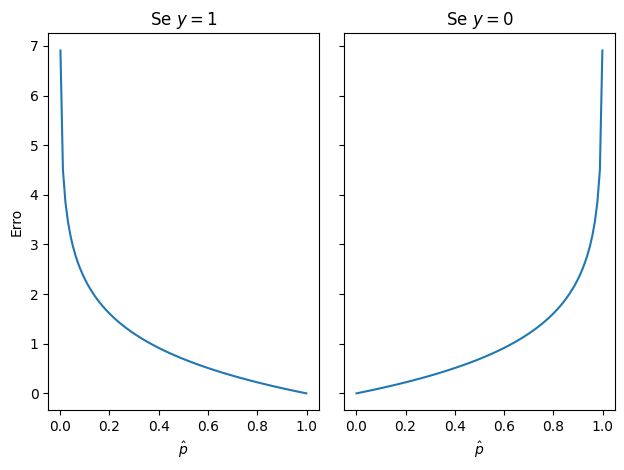

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True)

x = np.linspace(0.001, 0.999, 100)  # evitar erros pq log(0) é inf e log(1) é 0
ax[0].plot(x, -np.log(x))
ax[0].set_title('Se $y=1$')
ax[0].set_xlabel('$\hat{p}$')
ax[0].set_ylabel('Erro')

ax[1].plot(x, -np.log(1 - x))
ax[1].set_title('Se $y=0$')
ax[1].set_xlabel('$\hat{p}$')

plt.tight_layout()
plt.show()

### Para todo o dataset

$$Log~Loss = \frac{1}{m} \sum_{i=1}^{m} - \big[y^{(i)} \log (\hat{p}^{(i)}) + (1-y^{(i)}) \log (1-\hat{p}^{(i)}) \big]$$

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1`
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/titanic.png?raw=1" alt="titanic" style="width: 500px;"/>

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)

In [ ]:
X = titanic[feature_names]
y = titanic['survived']

In [ ]:
X

,pclass,female,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
885,3,1,39.0,29.1250
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
889,1,0,26.0,30.0000


In [ ]:
y

,survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [ ]:
print('Nomes dos Atributos: ', feature_names)
print('Tamanho de X: ', X.shape)
print('Tamanho de y: ', y.shape)

Nomes dos Atributos:  ['pclass', 'female', 'age', 'fare']
Tamanho de X:  (714, 4)
Tamanho de y:  (714,)


### Quebrando dataset em `train` e `test`

Usar a função do Scikit-Learn [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#### Argumentos:

* matriz a ser dividida - `X` ou `y`
* `test_size` - `float` ou `int` do tamanho do dataset de teste (padrão $0.25$)
* `train_size` - padrão `1 - test_size`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (535, 4)
Tamanho de X_test:  (179, 4)
Tamanho de y_train:  (535,)
Tamanho de y_test:  (179,)


### Regressão Logística
Usar a classe do Scikit-Learn [`sklearn.linear_model.LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

#### Argumentos:
* `max_iter` - `int` - Número máximo de iterações do *Gradient Descent*
    * padrão `100`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)
* `n_jobs` - `int` - Número de núcleos de processamento que será utilizado em paralelo
    * `None` - padrão
    * `-1` - usa todos os núcleos

#### Retorna:
* Objeto `estimator` do Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=123)

### Classe `Estimators`

* `.fit()` - Treina o Modelo
    * `X`
    * `y`
* `.predict()` - Gera predições do modelo
    * `X`
* `.coef_` - Retorna os coeficientes do modelo ($\theta_i$)
* `.intercept_` - Retorna o viés/constante (*bias/intercept*) do modelo ($\theta_0$)

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [ ]:
# Coeficientes do modelo
for feature, coef in zip(feature_names, clf.coef_[0].tolist()):
    print(f"{feature}: {round(coef, 3)}")

# Constante do modelo
print(f"Constante: {round(clf.intercept_[0], 3)}")

pclass: -1.11
female: 2.477
age: -0.028
fare: 0.002
Constante: 1.828


In [ ]:
# Caso de uma mulher na 3ª classe com idade 33 e que pagou £0.5
#         θ_0  +  θ_1 * x_1  +  θ_2 * x_2  +  θ_3 * x_3    +  θ_4 * x_4

In [ ]:
# Caso de uma mulher na 3ª classe com idade 33 e que pagou £0.5
#         θ_0  +  θ_1 * x_1  +  θ_2 * x_2  +  θ_3 * x_3    +  θ_4 * x_4
logistic(1.828 + (-1.11 * 3) + (2.477 * 1) + (-0.028 * 33) + (0.5 * 0.002))

0.5129970714585417

In [ ]:
input = pd.DataFrame([[3, 1, 33, 0.5]], columns=feature_names)
input

,pclass,female,age,fare
0,3,1,33,0.5


In [ ]:
clf.predict(input)

array([1])

In [ ]:
clf.predict_proba(input)

array([[0.48486638, 0.51513362]])

In [ ]:
# Caso de uma homem na 3ª classe com idade 50 e que pagou £2
#         θ_0  +  θ_1 * x_1  +  θ_2 * x_2  +  θ_3 * x_3    +  θ_4 * x_4
logistic(1.828 + (-1.11 * 3) + (2.477 * 0) + (-0.028 * 50) + (2 * 0.002))

0.05225251881725587

In [ ]:
# Caso de uma mulher na 1ª classe com idade 18 e que pagou £100
#         θ_0  +  θ_1 * x_1  +  θ_2 * x_2  +  θ_3 * x_3    +  θ_4 * x_4
logistic(1.828 + (-1.11 * 1) + (2.477 * 1) + (-0.028 * 18) + (100 * 0.002))

0.9473997373410309

In [ ]:
input = pd.DataFrame([[1, 1, 18, 100]], columns=feature_names)
clf.predict_proba(input)

array([[0.05204715, 0.94795285]])

### Acurácia do Modelo
Usar a função do Scikit-Learn [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Retorna um score de acurácia `float` entre $0$ e $1$

#### Argumentos
* `y_true`: Classes Verdadeiras
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
* `y_pred`: Classes Previstas pelo Modelo
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)

In [ ]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)

print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.81
Acurácia de Teste: 0.77
